In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import librosa
from librosa import display
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [3]:
#Sample audio loading
filepath="C:\\Users\\Ratan\\Downloads\\UrbanSound8K\\UrbanSound8K\\audio\\fold1\\7061-6-0-0.wav"

data,sr=librosa.load(filepath)

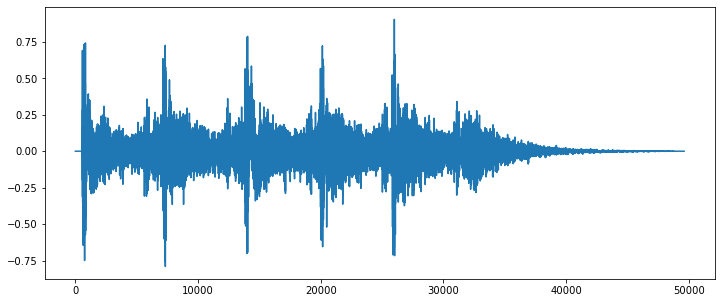

In [4]:
plt.figure(figsize=(12,5))
plt.plot(data)
plt.show()

In [5]:
#loading mfccs of sample audio
mfccs=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=40)
mfccs

array([[-1.27784286e+02,  7.49646759e+00,  1.54761038e+01, ...,
        -5.69353333e+02, -5.91727539e+02, -6.10657715e+02],
       [ 3.08279037e+01,  2.37197456e+01,  1.14163637e+01, ...,
         4.30511932e+01,  2.58880386e+01,  1.28298626e+01],
       [-3.34168816e+00, -1.20303555e+01, -1.50050745e+01, ...,
        -1.11037197e+01, -7.55063057e+00,  2.01510295e-01],
       ...,
       [ 6.19092584e-01, -3.26032782e+00, -4.75591850e+00, ...,
         2.40957665e+00,  3.16997099e+00, -2.12651789e-01],
       [-1.00570602e+01, -9.35991478e+00, -6.44673681e+00, ...,
        -5.02009988e-02,  7.28949606e-01, -9.00580645e-01],
       [ 1.91516113e+00,  2.07361174e+00,  3.06835938e+00, ...,
        -2.06091785e+00, -2.23126888e+00, -1.77455389e+00]], dtype=float32)

In [6]:
mfccs.shape

(40, 97)

In [7]:
mfccs.T.shape

(97, 40)

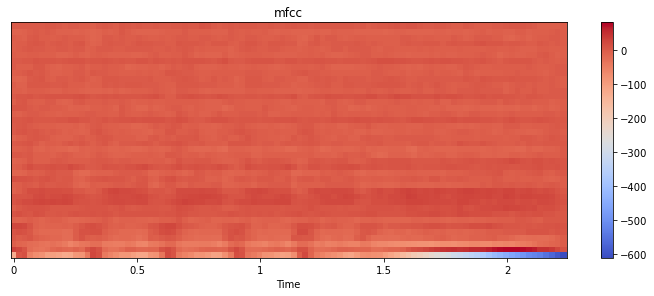

In [8]:
#plotting mfcc of sample audio

plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('mfcc')
plt.show()

In [9]:
#reading the metadata, this contains mapping of the audio data and is used while extracting the audio file

metadata_file_path='C:/Users/Ratan/Downloads/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv'

metadata=pd.read_csv(metadata_file_path)

In [10]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [11]:
#this function returns 40 features using mfcc for each audio file

def get_features(path):
    data,samp_rate=librosa.load(path)
    mfcc_data=librosa.feature.mfcc(y=data,sr=samp_rate,n_mfcc=40)
    scaled_mfcc_data=np.mean(mfcc_data.T,axis=0)
    
    return scaled_mfcc_data

In [12]:
#tqdm shows iteration progress
#feature extraction process

extracted_features=[]
basic_path='C:/Users/Ratan/Downloads/UrbanSound8K/UrbanSound8K/audio/'
for index,values in tqdm(metadata.iterrows()):
    features=get_features(basic_path+'fold'+str(values['fold'])+'/'+str(values['slice_file_name']))
    labels=values['class']
    extracted_features.append([features,labels])
    
extracted_features

3555it [07:59,  7.80it/s]C:\Users\Ratan\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [18:11, 11.75it/s]C:\Users\Ratan\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8327it [18:11, 15.39it/s]C:\Users\Ratan\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [19:00,  7.66it/s]


[[array([-2.12388992e+02,  6.32203064e+01, -1.23450676e+02, -6.01096840e+01,
         -1.45260382e+01, -2.91612396e+01, -4.60243702e+00,  1.23008986e+01,
          1.23523340e+01,  8.94086075e+00, -7.12606812e+00, -2.40851521e+00,
         -1.34658747e+01,  6.45374155e+00, -3.03201485e+00, -3.86296511e+00,
         -1.55475702e+01, -4.23517495e-01, -3.08698511e+00,  6.59171963e+00,
         -1.12652445e+01, -7.59900570e+00,  5.39486790e+00, -2.68859720e+00,
         -6.40224743e+00,  3.22201878e-01, -4.07286978e+00,  5.11717224e+00,
         -6.88293743e+00, -4.74760866e+00,  1.68259889e-01,  7.81362677e+00,
         -1.17126191e+00,  2.66304231e+00, -6.64488506e+00, -1.89582276e+00,
          2.05643249e+00, -5.87602735e-01, -1.72748387e+00,  1.49297786e+00],
        dtype=float32),
  'dog_bark'],
 [array([-417.6183    ,  100.20317   ,  -43.86042   ,   51.93532   ,
            8.995737  ,    8.822695  ,   10.350245  ,    2.7687106 ,
            6.1990805 ,    5.092185  ,   -4.3963475 

In [13]:
#first audio sample features shape

extracted_features[0][0].shape

(40,)

In [14]:
len(extracted_features)

8732

In [15]:
#dataframe to visualize our data

features_data_frame=pd.DataFrame(extracted_features,columns=['Features','Class'])
features_data_frame

,Features,Class
0,"[-212.38899, 63.220306, -123.450676, -60.10968...",dog_bark
1,"[-417.6183, 100.20317, -43.86042, 51.93532, 8....",children_playing
2,"[-453.02194, 113.25124, -38.465054, 44.08003, ...",children_playing
3,"[-407.13647, 92.125496, -25.970715, 43.708797,...",children_playing
4,"[-440.28067, 104.76962, -43.564396, 51.59294, ...",children_playing
...,...,...
8727,"[-392.01212, 126.2669, -41.536823, 26.79965, 0...",car_horn
8728,"[-340.03702, 77.27097, -36.169975, 42.84119, -...",car_horn
8729,"[-297.9465, 102.9823, -37.641483, 27.70418, -1...",car_horn
8730,"[-337.5598, 116.2132, -45.745705, 25.864134, -...",car_horn


In [16]:
#converting the above data frame to list

x=np.array(features_data_frame['Features'].to_list())
y_temp=np.array(features_data_frame['Class'].to_list())

In [17]:
#One hot encoding for y data using label encoder

le=LabelEncoder()
y=to_categorical(le.fit_transform(y_temp))

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [22]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (6549, 40)
x_test shape: (2183, 40)
y_train shape: (6549, 10)
y_test shape: (2183, 10)


In [24]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential

In [25]:
model=Sequential()

In [26]:
#Layer 1
model.add(Dense(256,input_dim=40))
model.add(Activation('relu'))
model.add(Dropout(0.4))

#Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Layer 3
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.3))

#Output Layer

model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               1

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=100)

Epoch 1/100
66/66 [==============================] - 0s 6ms/step - loss: 0.3222 - accuracy: 0.8899 - val_loss: 0.2835 - val_accuracy: 0.9153
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 0.3078 - accuracy: 0.8971 - val_loss: 0.2813 - val_accuracy: 0.9153
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.8980 - val_loss: 0.2900 - val_accuracy: 0.9084
Epoch 4/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2807 - accuracy: 0.9027 - val_loss: 0.2784 - val_accuracy: 0.9111
Epoch 5/100
66/66 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.8960 - val_loss: 0.2748 - val_accuracy: 0.9217
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.8992 - val_loss: 0.2780 - val_accuracy: 0.9230
Epoch 7/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2943 - accuracy: 0.9001 - val_loss: 0.2696 - val_accuracy: 0.9175
Epoch 8/100
6

Epoch 59/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2305 - accuracy: 0.9241 - val_loss: 0.2458 - val_accuracy: 0.9258
Epoch 60/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.9189 - val_loss: 0.2420 - val_accuracy: 0.9235
Epoch 61/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.9246 - val_loss: 0.2377 - val_accuracy: 0.9276
Epoch 62/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2558 - accuracy: 0.9151 - val_loss: 0.2481 - val_accuracy: 0.9258
Epoch 63/100
66/66 [==============================] - 0s 7ms/step - loss: 0.2185 - accuracy: 0.9267 - val_loss: 0.2651 - val_accuracy: 0.9143
Epoch 64/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.9214 - val_loss: 0.2476 - val_accuracy: 0.9267
Epoch 65/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2312 - accuracy: 0.9227 - val_loss: 0.2574 - val_accuracy: 0.9166
Epoch 

In [33]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss:',test_accuracy[0])
print('Test Accuracy:',test_accuracy[1])

Loss: 0.2652345895767212
Accuracy: 0.9225835800170898
